# 5. pandas 시작하기

* 고수준의 자료구조와 파이썬에서 빠르고 쉽게 사용할 수 있는 데이터 분석 도구를 포함하고 있는 라이브러리
* 다른 산술 계산 도구인 `NumPy`와 `Scipy`, 분석 라이브러리인 `statsmodels`와 `scikit-learn`, 시각화 도구인 `matplotlib`과 함께 사용하는 경우가 흔함
* for문을 사용하지 않고 데이터를 처리한다거나 배열 기반의 함수를 제공하는 등 NumPy의 배열 기반 계산 스타일을 많이 차용함

* pandas와 NumPy의 가장 큰 차이점?
    - pandas : 표 형식의 데이터나 다양한 형태의 데이터를 다루는 데 초점을 맞춰 설계
    - NumPy : 단일 산술 배열 데이터를 다루는 데 특화

In [64]:
# pandas의 import 컨벤션 => 앞으로 pandas를 pd로 부르겠다라는 뜻
import pandas as pd 

In [65]:
# Series와 DataFrame는 로컬 네임스페이스로 임포트하는게 편하므로 그렇게 사용
from pandas import Series, DataFrame

[전역/지역 네임스페이스](https://hcnoh.github.io/2019-01-30-python-namespace)


### + import로 모듈 불러오기
1. import 모듈 as 이름 (모듈 가져오기) 
2. from 모듈 import 변수/함수/클래스 (모듈의 일부만 가져오기)

[참고링크 : 코딩도장](https://dojang.io/mod/page/view.php?id=2441)

In [66]:
# 첫번째 방법
import math as m # math 모듈을 가져오면서 이름을 m으로 지정
m.sqrt(4.0)  # m으로 제곱근 함수 사용

2.0

In [18]:
# 두번째 방법
from math import sqrt  #math 모듈에서 sqrt함수만 가져옴
sqrt(4.0)

2.0

***

In [19]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)


## 5.1 pandas 자료구조 소개

### 5.1.1 Series

* Seires는 일련의 객체를 담을 수 있는 1차원 배열 같은 자료구조(어떤 NumPy 자료형이라도 담을 수 있다.)
* 색인(index)이라고 하는 배열의 데이터와 연관된 이름을 가지고 있다.

In [20]:
# 가장 간단한 Series 객체는 배열 데이터로부터 생성할 수 있다.
obj = Series([4, 7, -5, 3]) # pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

* Series 객체의 문자열 표현
    - 왼쪽에 색인(index), 오른쪽에 해당 색인의 값을 보여줌
    - 위 예제예서는 데이터의 색인을 지정하지 않았으니 기본색인인 정수 0에서 N-1(N은 데이터의 길이)까지의 숫자가 표시됨    
    
***
* Series의 배열과 색인 객체는 각각 values와 index 속성을 통해 얻을 수 있음

In [21]:
# values
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [22]:
# index 속성
obj.index  # like range(4)

RangeIndex(start=0, stop=4, step=1)

***
* 각각의 데이터를 지칭하는 색인을 지정하여 Series 객체를 생성해야 할 때는 다음처럼 한다

In [23]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(obj2)
obj2.index

d    4
b    7
a   -5
c    3
dtype: int64


Index(['d', 'b', 'a', 'c'], dtype='object')

***
* NumPy 배열과 비교하자면, 단일 값을 선택하거나 여러 값을 선택할 때 색인으로 라벨을 사용할 수 있다. 

In [24]:
obj2['a']

-5

In [25]:
obj2['d'] = 6
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

* ['c', 'a', 'd']는 (정수가 아니라 문자열이 포함되어 있지만) 색인의 배열로 해석된다
***

* 불리언 배열을 사용해서 값을 걸러 내거나 산술 곱셈을 수행하거나 또는 수학 함수를 적용하는 등 NumPy 배열 연산을  수행해도 색인-값 연결이 유지된다.

In [26]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [27]:
obj2 > 0

d     True
b     True
a    False
c     True
dtype: bool

In [28]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [29]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

***
* Series를 이해하는 다른 방법 = `고정 길이의 정렬된 사전형`이라고 생각하는 것
* Series는 색인값에 데이터를 매핑하고 있으므로 사전형과 비슷
* Series 객체는 파이썬의 사전형을 인자로 받아야 하는 많은 함수에서 사전형을 대체하여 사용할 수 있음.

In [30]:
'b' in obj2

True

In [31]:
# 키 in 딕셔너리.keys() => Series에도 적용가능
'b' in obj2.keys()

True

In [32]:
'e' in obj2

False

In [33]:
obj2.keys()

Index(['d', 'b', 'a', 'c'], dtype='object')

In [34]:
#obj2.values() # obj.values 가 따로 존재하기 때문에..?

In [35]:
# 딕셔너리.get('키') => 있으면 value 반환
obj2.get('b')

7

***
* 파이썬 사전형에 데이터를 저장해야 한다면 파이썬 사전 객체로부터 Series 객체를 생성할 수 있다

In [36]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

* 사전 객체만을 가지고 Series 객체를 생성하면?
    - 생성된 Series 객체의 색인에는 사전의 키값이 순서대로 들어간다.
***
* 색인을 직접 지정하고 싶다면 원하는 순서대로 색인을 직접 넘겨줄 수도 있다

In [37]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

* 위 예제에서 sdata에 있는 값 중 3개만 확인할 수 있다 -> 'California'에 대한 값은 찾을 수 없기 때문!
* NaN 으로 표시되고, pandas에서는 누락된 값/NA값으로 취급됨
* 'Utah'는 states에 포함되어 있지 않으므로 실행 결과에서 빠지게 됨

***

* pandas의 isnull와 notnull 함수 : 누락된 데이터를 찾을 때 사용
    

In [38]:
# NaN 값을 True로
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [39]:
# NaN가 아닌 값을 True로
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

* 이 메서드는 Series의 인스턴스 메서드로도 존재함

In [40]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

=> 누락된 데이터를 처리하는 방법은 7장에서 좀 더 자세히 살펴볼 예정..

***

* Series의 유용한 기능은 산술 연산에서 색인과 라벨로 자동정렬하는 것
    - 데이터 정렬에 대한 내용은 나중에 더 살펴볼 예정..
    - join 연산과 비슷하다고 여겨질 것 [join 관련 참고링크](https://advenoh.tistory.com/23)

In [41]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [42]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [43]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

* Series 객체와 Series의 색인은 모두 name 속성이 있다 => pandas의 핵심 기능과 밀접한 관련

In [44]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

* Series의 색인은 대입하여 변경할 수 있다

In [45]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [46]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### 5.1.2 DataFrame

* 표 같은 스프레드시트 형식의 자료구조
* 여러 개의 컬럼이 있는데 있는데 각 컬럼은 서로 다른 종류의 값 (숫자, 문자열, 불리언 등)을 담을 수 있음
* row와 column에 대한 색인을 갖고 있음
* 색인의 모양이 같은 Series 객체를 담고 있는 파이썬 사전으로 생각하면 편함 ->?
* 내부적으로 데이터는 리스트나 사전 또는 1차원 배열을 담고 있는 다른 컬렉션이 아니라 하나 이상의 2차원 배열에 저장됨. ->?

* DataFrame 객체는  다양한 방법으로 생성가능 !
    - 가장 흔한 방법 : 같은 길이의 리스트에 담긴 사전을 이용하거나 NumPy 배열을 이용

In [67]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

* 만들어진 DataFrame의 색인은 Series와 같은 방식으로 자동으로 대입되며 컬럼은 정렬되어 저장됨

In [68]:
frame # 왜 책이랑 컬럼 순서가 다를까요...? 188페이지  버전문제? 

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [69]:
frame.head(3) # 처음 5개의 row만 출력

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6


* 원하는 순서대로 columns를 지정하면 원하는 순서를 가진 DataFrame 객체가 생성됨

In [50]:
pd.DataFrame(data, columns=['year', 'state', 'pop']) 

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


* Series와 마찬가지로 사전에 없는 값을 넘기면 결측치로 저장됨

In [51]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [52]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

* DataFrame의 컬럼은 Series처럼 사전 형식의 표기법으로 접근하거나 속성 형식으로 접근 할 수 있다.

In [53]:
frame2['state'] # stat 컬럼만 보여줌

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [54]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [55]:
frame2['year'] # 위에랑 같음

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

* `주의` : frame2[column] 형태로 사용하는 것은 어느 컬럼이든 가능 / frame.column 형태로 사용하는 것은 파이썬에서 사용 가능한 변수 이름 형식일 때만 작동함
***

* 반환된 Series 객체가 DataFrame과 같은 색인을 가지면 알맞은 값으로 name 속성이 채워진다 ->?
* 로우는 위치나 loc 속성을 이용해서 이름을 통해 접근 가능

In [56]:
frame2.head()

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [57]:
frame2.loc['three'] # loc을 이용하여 three라는 색인이름을 통해 행에 접근 => 행을 Series 형태로 가져옴

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

* 컬럼은 대입이 가능하다. 예를 들어 현재 비어있는 'debt' 컬럼에 스칼라값이나 배열의 값을 대입할 수 있다.

In [58]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [59]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


* 리스트나 배열을 컬럼에 대입할 때는 대입하려는 값의 길이가 DataFrame의 크기와 동일해야 한다. 
* Series를 대입하면 DataFrame의 색인에 따라 값이 대입되며 존재하지 않는 색인에는 결측치(NaN)가 대입된다.

In [60]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [61]:
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


* 존재하지 않는 컬럼을 대입하면 새로운 컬럼을 생성한다. 파이썬 사전형에서처럼 `del`예약어를 사용해서 컬럼을 삭제할 수 있다.


* `del` 예약어에 대한 예제로, `state` 컬럼의 값이 'Ohio'인지 아닌지에 대한 불리언 값을 담고 있는 새로운 컬럼을 생성해보자.

In [212]:
frame2['eastern'] = frame2.state == 'Ohio'  # frame2.eastern 으로는 생성이 되지 않음
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


* `del`예약어를 이용해서 이 컬럼을 삭제할 수 있다.

In [213]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

***

* `주의` : 이렇게 얻은 Series 객체에 대한 변경은 실제 DataFrame에 반영됨, 복사가 된것이 아니므로 copy매서드를 통해 복사본을 만들어야된다.

In [216]:
frame_copy = frame2.copy()
frame_copy

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [217]:
frame_copy['pop'] # Series 객체

one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
six      3.2
Name: pop, dtype: float64

In [218]:
frame_copy['pop'] =0.5
frame_copy['pop']

one      0.5
two      0.5
three    0.5
four     0.5
five     0.5
six      0.5
Name: pop, dtype: float64

In [219]:
frame_copy

,year,state,pop,debt
one,2000,Ohio,0.5,NaN
two,2001,Ohio,0.5,-1.2
three,2002,Ohio,0.5,NaN
four,2001,Nevada,0.5,-1.5
five,2002,Nevada,0.5,-1.7
six,2003,Nevada,0.5,NaN


***

* 중첩된 사전을 이용해서 데이터를 생성할 수 있다. 다음과 같은 중첩된 사전이 있다고 하자.

In [220]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

* 이 중첩된 사전을 DataFrame에 넘기면 바깥에 있는 사전의 키는 컬럼이 되고 안에 있는 키는 로우가 된다.

In [221]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


* NumPy 배열과 유사한 문법으로 데이터를 전치 (컬럼과 로우를 뒤집음)할 수 있다.

In [222]:
frame3.T # (3,2) -> (2,3)

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


* 중첩된 사전을 이용해서 DataFrame을 생성할 때 안쪽에 있는 사전값은 키값별로 조합되어 결과의 색인이 되지만 색인을 직접 지정하면 지정된 색인으로 DataFrame을 생성한다.

In [223]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


* Series 객체를 담고 있는 사전 데이터도 같은 방식으로 취급된다.

In [225]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [226]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [229]:
frame3['Ohio'][:-1]

2001    1.7
2002    3.6
Name: Ohio, dtype: float64

In [230]:
frame3['Nevada'][:2]

2001    2.4
2002    2.9
Name: Nevada, dtype: float64

* 만일 데이터프레임의 색인(index)과 컬럼(column)에 `name`속성을 지정했다면 이 역시 함께 출력된다.

In [151]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


* Series와 유사하게 `values`속성은 DataFrame에 저장된 데이터를 2차원 배열로 반환한다.

In [152]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

DataFrame의 컬럼이 서로 다른 `dtype`을 가지고 있다면 모든 컬럼을 수용하기 위해 그 컬럼의 배열의 `dtype`이 선택된다. ->?

In [71]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### 5.1.3 색인 객체

* pandas의 색인 객체는 표 형식의 데이터에서 각 로우와 컬럼에 대한 이름과 다른 메타데이터(축의 이름 등)를 저장하는 객체다. 
* Series나 DataFrame 객체를 생성할 때 사용되는 배열이나 다른 순차적인 이름은 내부적으로 색인으로 변환된다.

In [235]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [236]:
index[1:]

Index(['b', 'c'], dtype='object')

* 색인 객체는 변경이 불가능하다.

In [234]:
# index[1] = 'd'  # TypeError

TypeError: Index does not support mutable operations

* 그러므로 자료구조 사이에서 안전하게 공유될 수 있다.

In [237]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [238]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)

In [239]:
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [240]:
obj2.index is labels

True

* 배열과 유사하게 Index 객체도 고정 크기로 동작한다.

In [161]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [162]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [163]:
'Ohio' in frame3.columns

True

In [164]:
2003 in frame3.index

False

* 파이썬의 집합과는 달리 pandas의 인덱스는 중복되는 값을 허용한다.

In [165]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

* 중복되는 값으로 선택을 하면 해당 값을 가진 모든 항목이 선택된다.

In [62]:
ex = pd.Series([1.5, -2.5, 0], index=['foo', 'foo', 'bar'])
ex

foo    1.5
foo   -2.5
bar    0.0
dtype: float64

In [63]:
ex['foo']

foo    1.5
foo   -2.5
dtype: float64




각각의 색인은 자신이 담고 있는 데이터에 대한 정보를 취급하기 위한 여러 가지 메서드와 속성을 가지고 있다.

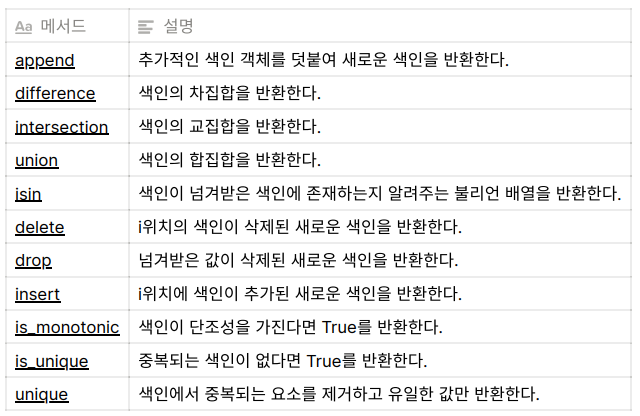